# Mini Project 3: Insertion Sort
#### Implement insertion sort as discussed in class. For input, generate a list of random numbers. Write a separate function to test if the sort gives the correct output -- this is easy as we just have to iterate over the array and check that every element is less than the next one.

#### Use the timeit library (and the function timeit.default_timer()) to count how long the sort function takes to run on arrays of different length. Plot these run times 

#### Insertion sort is very sensitive to the order of the input data. What happens if the input is already sorted (or close to sorted)? What if it is sorted in decreasing order? Determine what to expect theoretically and check with your implementation.

#### Part 1: Generate Random Numbers

In [9]:
import random

def generate_random_list(size, min_val=0, max_val=100):
    return [random.randint(min_val, max_val) for _ in range(size)]

random_list = generate_random_list(10)
print("Random List:", random_list)


Random List: [6, 88, 91, 98, 35, 15, 85, 49, 4, 30]


#### Part 2: Implement Insertion Sort

In [10]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

test_list = [5, 3, 8, 6, 2]
print("Before Sorting:", test_list)
insertion_sort(test_list)
print("After Sorting:", test_list)


Before Sorting: [5, 3, 8, 6, 2]
After Sorting: [2, 3, 5, 6, 8]


#### Part 3: Test If a List Is Sorted

In [11]:
def is_sorted(arr):
    return all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1))

sorted_list = [1, 2, 3, 4, 5]
unsorted_list = [5, 3, 2, 1]
print("Is Sorted:", is_sorted(sorted_list))
print("Is Not Sorted:", is_sorted(unsorted_list))


Is Sorted: True
Is Not Sorted: False


#### Part 4: Measure Execution Time

In [12]:
import timeit

def measure_sort_time(arr):
    start = timeit.default_timer()
    insertion_sort(arr)
    return timeit.default_timer() - start

arr = generate_random_list(1000)
time_taken = measure_sort_time(arr.copy())
print(f"Time taken to sort 1000 elements: {time_taken:.6f} seconds")


Time taken to sort 1000 elements: 0.090851 seconds


#### Part 5: Analyze Input Sensitivity

In [13]:
size = 1000
random_list = generate_random_list(size)
sorted_list = sorted(random_list)
reverse_sorted_list = sorted(random_list, reverse=True)

time_random = measure_sort_time(random_list.copy())
time_sorted = measure_sort_time(sorted_list.copy())
time_reverse_sorted = measure_sort_time(reverse_sorted_list.copy())

print(f"Random List Sort Time: {time_random:.6f} seconds")
print(f"Sorted List Sort Time: {time_sorted:.6f} seconds")
print(f"Reverse Sorted List Sort Time: {time_reverse_sorted:.6f} seconds")


Random List Sort Time: 0.064831 seconds
Sorted List Sort Time: 0.000355 seconds
Reverse Sorted List Sort Time: 0.112190 seconds


#### Part 6: Plot Sorting Times

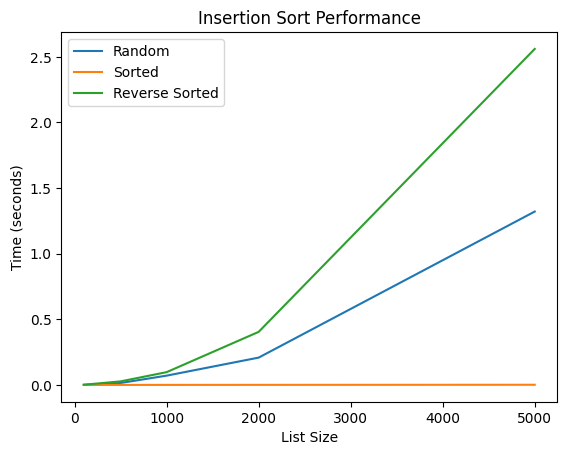

In [14]:
import matplotlib.pyplot as plt

def plot_sort_times():
    sizes = [100, 500, 1000, 2000, 5000]
    random_times, sorted_times, reverse_sorted_times = [], [], []

    for size in sizes:
        random_list = generate_random_list(size)
        sorted_list = sorted(random_list)
        reverse_sorted_list = sorted(random_list, reverse=True)

        random_times.append(measure_sort_time(random_list.copy()))
        sorted_times.append(measure_sort_time(sorted_list.copy()))
        reverse_sorted_times.append(measure_sort_time(reverse_sorted_list.copy()))

    plt.plot(sizes, random_times, label="Random")
    plt.plot(sizes, sorted_times, label="Sorted")
    plt.plot(sizes, reverse_sorted_times, label="Reverse Sorted")
    plt.xlabel("List Size")
    plt.ylabel("Time (seconds)")
    plt.title("Insertion Sort Performance")
    plt.legend()
    plt.show()

plot_sort_times()
